<a href="https://colab.research.google.com/github/zekiyerdem/zekiyerdem/blob/main/ice_cream_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

## **Ice Cream Production Data**

In [ ]:
#read data
df_ice_cream = pd.read_csv('ice_cream.csv')

In [ ]:
df_ice_cream.head()

,days,production,days2
0,1972-01-01,59.9622,1972-01-01
1,1972-02-01,67.0605,1972-02-01
2,1972-03-01,74.2350,1972-03-01
3,1972-04-01,78.1120,1972-04-01
4,1972-05-01,84.7636,1972-05-01


In [ ]:
#rename columns to something more understandable
df_ice_cream.rename(columns={'DATE':'days', 'IPN31152N':'production'}, inplace=True)

In [ ]:
df_ice_cream.head()

,days,production
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


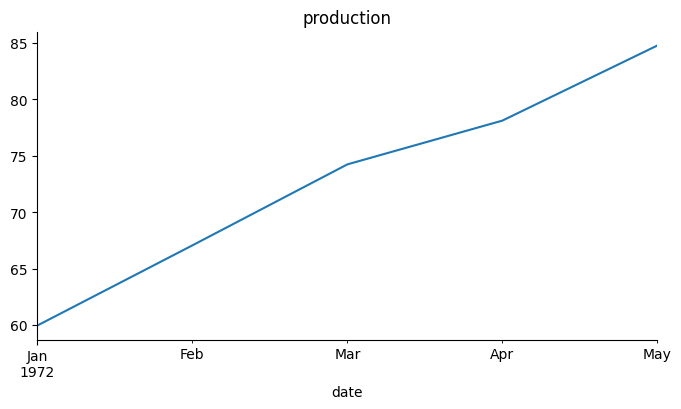

In [ ]:
from matplotlib import pyplot as plt
_df_24['production'].plot(kind='line', figsize=(8, 4), title='production')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#convert date column to datetime type
df_ice_cream.loc[:,"days"]
df_ice_cream['days'] = pd.to_datetime(df_ice_cream['days'])
df_ice_cream.head()

,days,production
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [ ]:

print(type(df_ice_cream.iloc[0,0]))
print(type(df_ice_cream.iloc[0,1]))


<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'numpy.float64'>


In [ ]:
#set date as index
#df_ice_cream.set_index('days', inplace=True)
df_ice_cream.head()

,production
days,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [ ]:
#just get data from 2010 onwards
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]
print(df_ice_cream.head())

            production
days                  
2010-01-01     91.2895
2010-02-01    110.4994
2010-03-01    127.0971
2010-04-01    132.6468
2010-05-01    134.5576


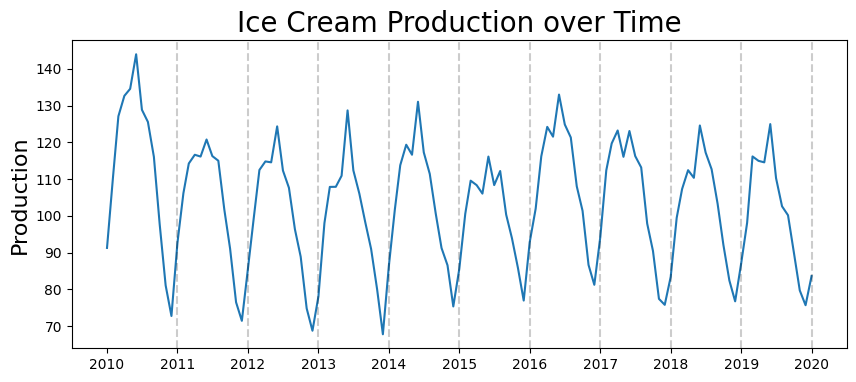

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

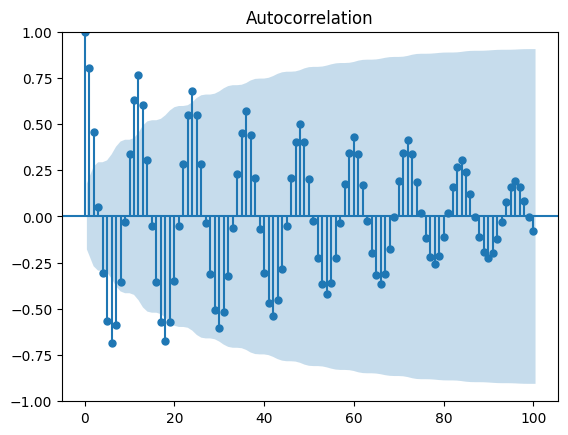

In [ ]:
acf_plot = plot_acf(df_ice_cream.production, lags=100)

# **Based on decaying ACF, we are likely dealing with an Auto Regressive process**